# CREDIT CARD FRAUD DETECTION ANALYSIS #

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Loading the dataset from the csv file using pandas:

df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [27]:
'Here Time is in seconds. Converting Time into Minutes, Hours and Days for further detailed analysis'

# Converting time(in seconds) into Minutes:
df['Minutes'] = df['Time'] // 60

# Converting time(in minutes) into Hours:
df['Hours'] = df['Time'] // 3600

# Converting time(in hours) into Days:
df['Days'] = df['Time'] // (3600 * 24)

In [6]:
# Fetching statistical information from the dataset
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 34 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   Time     284807 non-null  float64
 1   V1       284807 non-null  float64
 2   V2       284807 non-null  float64
 3   V3       284807 non-null  float64
 4   V4       284807 non-null  float64
 5   V5       284807 non-null  float64
 6   V6       284807 non-null  float64
 7   V7       284807 non-null  float64
 8   V8       284807 non-null  float64
 9   V9       284807 non-null  float64
 10  V10      284807 non-null  float64
 11  V11      284807 non-null  float64
 12  V12      284807 non-null  float64
 13  V13      284807 non-null  float64
 14  V14      284807 non-null  float64
 15  V15      284807 non-null  float64
 16  V16      284807 non-null  float64
 17  V17      284807 non-null  float64
 18  V18      284807 non-null  float64
 19  V19      284807 non-null  float64
 20  V20      284807 non-null  

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V24,V25,V26,V27,V28,Amount,Class,Minutes,Hours,Days
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727,1579.739195,25.845703,0.491635
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527,791.468843,13.184831,0.499931
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000,903.000000,15.000000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000,1411.000000,23.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000,2322.000000,38.000000,1.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000,2879.000000,47.000000,1.000000


In [18]:
# Class distribution: counting total number of '0' & '1' in Class field.

class_distribution = df['Class'].value_counts()
class_distribution

0    284315
1       492
Name: Class, dtype: int64

                Here '0' means Vaild transaction and '1' means Fraud transaction.

In [29]:
# Determining fraudlent transactions percentage in dataset:

fraud = df[df['Class'] == 1] 
valid = df[df['Class'] == 0] 
fraction = len(fraud)/(len(fraud)+len(valid))*100
print('Fraudulent transaction %: ', fraction) 
print('Fraud Transaction: {}'.format(len(df[df['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(df[df['Class'] == 0])))

Fraudulent transaction %:  0.1727485630620034
Fraud Transaction: 492
Valid Transactions: 284315


# Only 0.17% of the transactions are fraudulent out of all transactions.
# The data is highly imbalanced, with fraudulent transactions accounting for less than 1%

#

In [30]:
# Amount details of both Fraudulent and Valid transactions

print('Amount details of the Fraudulent transaction: ') 
print(fraud.Amount.describe())
print('\n')
print('Amount details of Valid transaction: ') 
print(valid.Amount.describe())

Amount details of the Fraudulent transaction: 
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64


Amount details of Valid transaction: 
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64


# Here, we observe that the average transaction amount for fraudulent transactions is higher than that for valid transactions.

#

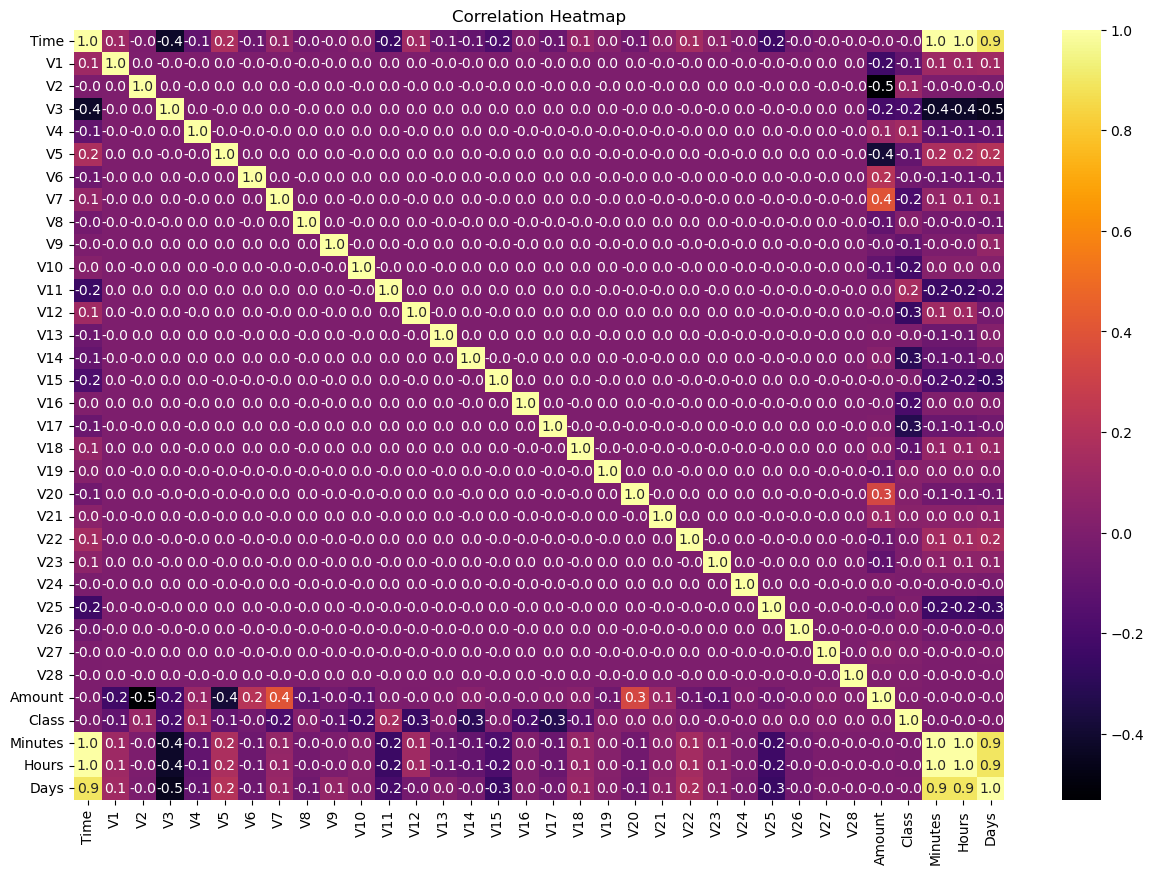

In [34]:
# Creating a heatmap to check correlation between two variables in dataset.
corrmat = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corrmat, cmap='inferno', annot=True, fmt=".1f")
plt.title('Correlation Heatmap')
plt.show()

# Here, most of the features do not exhibit strong correlations with each other. However, there are some features that either show a positive or a negative correlation.
# For instance, V2 and V5 are highly negatively correlated with the 'Amount' feature.

#

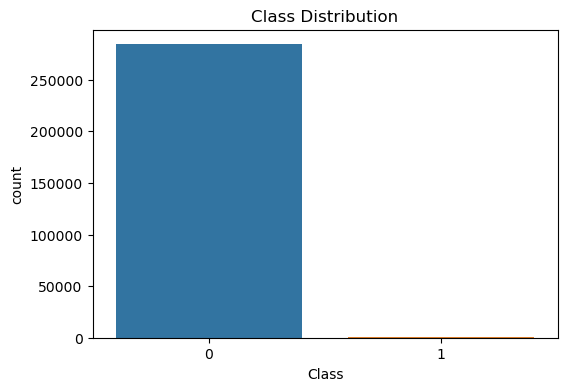

In [33]:
# Displaying Class distribution of both classes using countplot for counting observation:

plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=df)
plt.title('Class Distribution')
plt.show()

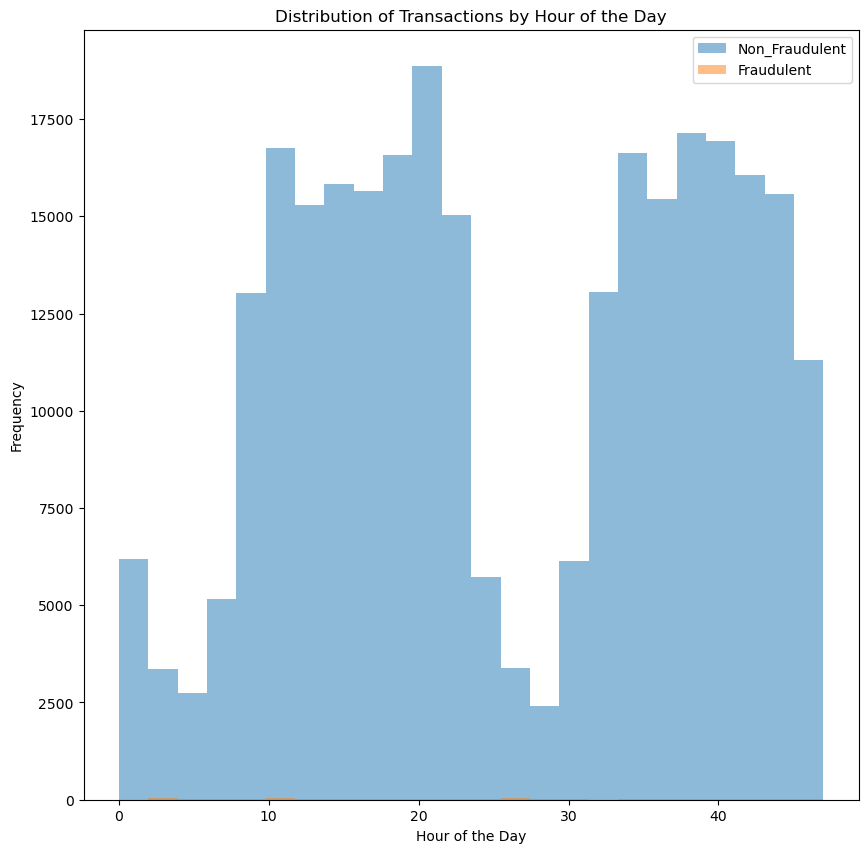

In [26]:
# Displaying Fraudulent data over hours:
# Here, 'Hours' represents the hours component extracted from the transaction timestamps.

plt.figure(figsize=(10,10))
plt.hist(valid['Hours'], bins=24, alpha=0.5, label='Non_Fraudulent')
plt.hist(fraud['Hours'], bins=24, alpha=0.5, label='Fraudulent')
plt.xlabel('Hour of the Day')
plt.ylabel('Frequency')
plt.title('Distribution of Transactions by Hour of the Day')
plt.legend()
plt.show()

# As seen above, fraudulent data is very low compared to Valid(non-fraudulent data). It is an imbalanced dataset.

# To analyze it in more detail, we will create a sample dataset based on fraudulent data.

In [12]:
# Creating a sampled dataset for analysis:

non_fraudulent_sample = valid.sample(n=len(fraud), random_state=42)

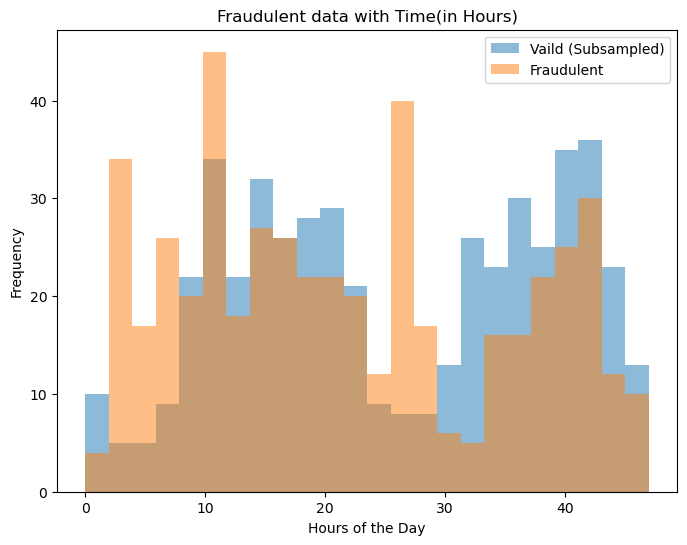

In [35]:
# Displaing distribution of transactions over the hours using sampled dataset.

valid_sample = valid.sample(n=len(fraud), random_state=42)
plt.figure(figsize=(8,6))
plt.hist(valid_sample['Hours'], bins=24, alpha=0.5, label='Vaild (Subsampled)')
plt.hist(fraud['Hours'], bins=24, alpha=0.5, label='Fraudulent')
plt.xlabel('Hours of the Day')
plt.title('Fraudulent data with Time(in Hours)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

                       Let's delve deeper and analyze the dataset by 'Days'.

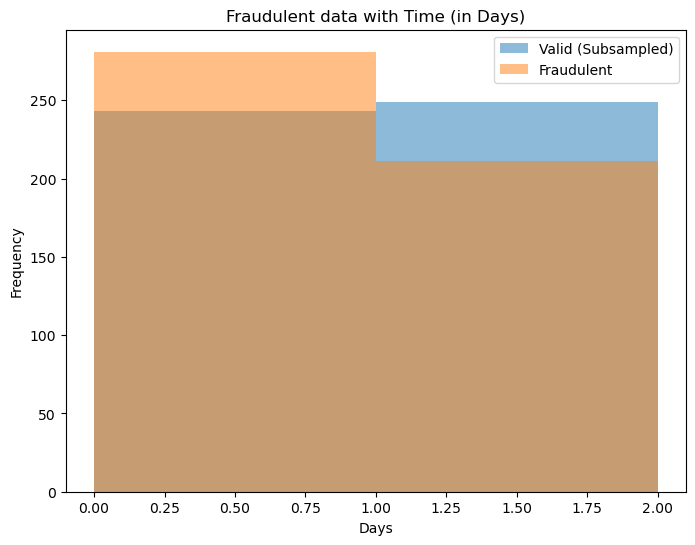

In [14]:
# Distribution of transactions over the days using sampled dataset.
plt.figure(figsize=(8, 6))
plt.hist(valid_sample['Days'], bins=range(int(valid_sample['Days'].max()) + 2), alpha=0.5, label='Valid (Subsampled)')
plt.hist(fraud['Days'], bins=range(int(fraud['Days'].max()) + 2), alpha=0.5, label='Fraudulent')
plt.xlabel('Days')
plt.title('Fraudulent data with Time (in Days)')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Here, we can observe that the majority of fraudulent transactions occurred on the first day.